# SLU11 - Tree-based models: Exercises

In [1]:
import inspect
import warnings
warnings.filterwarnings("ignore")

import hashlib

import pandas as pd
import numpy as np

from IPython.display import Image

from utils.utils import (
    make_data,
    make_exercise_data,
    separate_target_variable,
    process_categorical_features,
    visualize_tree
)

# Exercise 1 - Decision Trees

## 1.1 Gini impurity

Used by the CART algorithm for classification, Gini impurity is an alternative to entropy.

Similarly to entropy, it is a way to measure node homogeneity. As such, it can be used to identify promising splits.

Take $p$ as the probability of the positive class, i.e., the proportion of positive cases in the set. The Gini impurity is given by:

$$I_G(p)= 1 - p^2 - (1-p)^2$$

It measures how often a randomly chosen element from the set would be incorrectly labeled.

In [2]:
def gini(p):
    #return the Gini impurity
    
    # YOUR CODE HERE
    return 1-p**2-((1-p)**2)
    # raise NotImplementedError()
    
    
data = make_data()

In [3]:
expected_hash_1 = '5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91b46729d73a27fb57e9'
assert hashlib.sha256(str(round(gini(p=0), 4)).encode('utf-8')).hexdigest() == expected_hash_1

expected_hash_2 = 'fa0caf4143366743bd4e6038047902f64d769e3e3efec2bb32aecf1d0c7c6201'
assert hashlib.sha256(str(round(gini(p=1/6), 4)).encode('utf-8')).hexdigest() == expected_hash_2

expected_hash_3 = '26135280b4d9cae287edf7dec0cde84815fd61414f9509d6a4376b09eb946862'
assert hashlib.sha256(str(round(gini(p=1/3), 4)).encode('utf-8')).hexdigest() == expected_hash_3

expected_hash_4 = 'd2cbad71ff333de67d07ec676e352ab7f38248eb69c942950157220607c55e84'
assert hashlib.sha256(str(round(gini(p=1/2), 4)).encode('utf-8')).hexdigest() == expected_hash_4

## 1.2 Applying the Gini 

### 1.2.1 Single node

Compute the impurity of a node that includes all instances where $x_i^{Humidity}$ is `'normal'`.

(Note that `'normal'` is a string, not a boolean.)

In [4]:
def compute_probability(node):
    # YOUR CODE HERE
    n = node.shape[0]
    f = (node["Class"] == 1).sum()

    return f / n

single_node_gini = gini(p=compute_probability(data[data["Humidity"]=="normal"]))
# YOUR CODE HERE
# raise NotImplementedError()

In [5]:
expected_hash_5 = '6382e07f9de0c85293aee2a45b88c61c28589419682ecc2f8c097f750e861a24'
wrong_condition_hash = 'd2cbad71ff333de67d07ec676e352ab7f38248eb69c942950157220607c55e84'

assert hashlib.sha256(str(round(single_node_gini, 2)).encode('utf-8')).hexdigest() != wrong_condition_hash, "Are you checking all instances where Class is TRUE?"
assert hashlib.sha256(str(round(single_node_gini, 2)).encode('utf-8')).hexdigest() == expected_hash_5, "Are you computing the probability for the right node?"

### 1.2.2 Single feature

Write a function to compute the mean impurity of branching on a given feature.

In [6]:
from statistics import mean


def mean_impurity(data, feature_name):
    feat_values = data[feature_name].unique()
    gini_values = []
    for feat_val in  feat_values:
        gini_values.append(gini(p=compute_probability(data[data[feature_name]==feat_val])))
    return mean(gini_values)
    # raise NotImplementedError()

In [7]:
assert 'mean(' in inspect.getsource(mean_impurity), "Are you using the mean function that was imported?"

expected_hash_6 = '60bb8f6c52a2aca85b1a3ae08e71f97dd3fa8603b55abefb09ebb0edfe5294d1'
assert hashlib.sha256(str(round(mean_impurity(data, 'Outlook'), 4)).encode('utf-8')).hexdigest() == expected_hash_6

expected_hash_7 = '944f11aadeebc86111e0d537211a68e2e559f194ca0b99186a345af21afda3bf'
assert hashlib.sha256(str(round(mean_impurity(data, 'Humidity'), 4)).encode('utf-8')).hexdigest() == expected_hash_7

expected_hash_8 = 'ad9dadb817c4ea957beef59cc28b49ccb843c8c0996b1492547942a1cc6925ba'
assert hashlib.sha256(str(round(mean_impurity(data, 'Windy'), 4)).encode('utf-8')).hexdigest() == expected_hash_8

expected_hash_9 = 'de6e0e452f9c1acd679e0b2a4b40bc40cad2cdf48541764e622ff50c8b7a3957'
assert hashlib.sha256(str(round(mean_impurity(data, 'Temperature'), 4)).encode('utf-8')).hexdigest() == expected_hash_9

## 1.3 Analyzing a decision tree

### 1.3.1 Import and train a DecisionTreeClassifier using the features in X, and the class in y. 

Notes:

* Set `random_state = 101`
* use the `entropy`criterion

In [8]:
exercise_data = make_exercise_data()
X, y = separate_target_variable(exercise_data)
X = process_categorical_features(X)

# Import the model
# YOUR CODE HERE
from random import random
from sklearn.tree import DecisionTreeClassifier
# raise NotImplementedError()


# Instantiate the model with random_state=101, and assign it to variable "model". Then fit it to the data
model = DecisionTreeClassifier(random_state=101, criterion="entropy")
model.fit(X, y)
# YOUR CODE HERE
# raise NotImplementedError()

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [9]:
params_hash = '6f0d2332a9eaad4077dc025b08324fb69cdaebf8c6de6a00b8c6c718e40f97e5'
assert hashlib.sha256(str(model.get_params()).encode('utf-8')).hexdigest() == params_hash, "Did you set all the required parameters?"

### 1.3.2 Analyze the resulting tree, and answer questions.

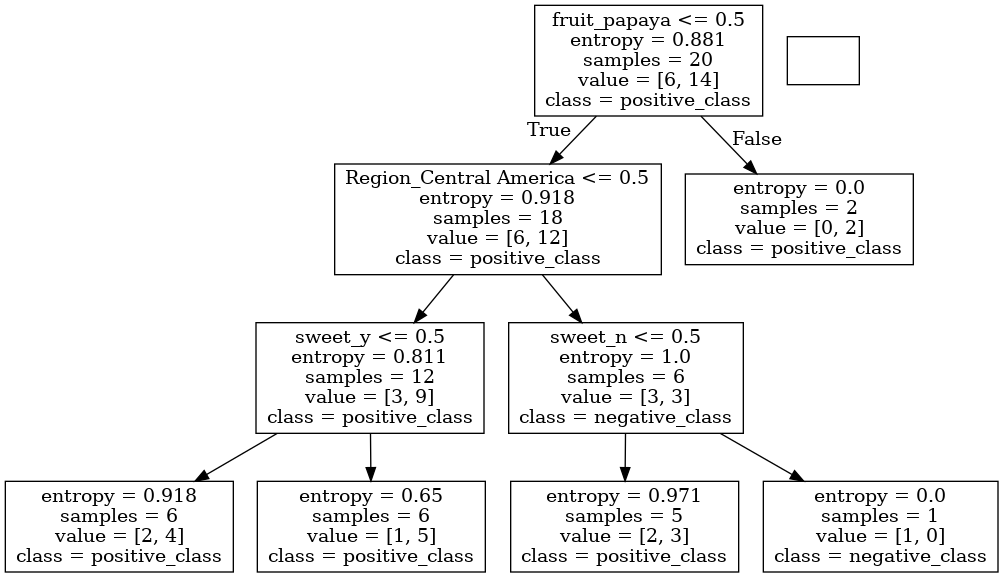

In [11]:
tree = visualize_tree(model, X.columns, ["negative_class", "positive_class"])
Image(tree)

a) A new instance of data has the following features: 

* `fruit` is not equal to `papaya`;
* `Region` is not equal to `Central America`;
* `sweet` is not equal to `y`.

What class does this new instance belong to? ('positive_class' or 'negative_class'). 
Assign the answer to variable `a_answer`

In [12]:
# a_answer = ...
# YOUR CODE HERE
a_answer = "positive_class"
# raise NotImplementedError()

b)  There is a **false sentence** in the options bellow. Please, **assign the number (1, 2, 3 or 4)** of the FALSE statement you think it is to variable b_answer:

1. when building a decision tree using the ID3 algorithm,  at each split, we select the attribute test that leads to the highest information gain.
2. Decision trees aren't extremely robust to overfitting.
3. We can use a decision tree to represent a set of complex rules.
4. Entropy can be seen as a measure of homogeneity in a set of values. The more entropy, the more homogeneous it will be.

In [33]:
# b_answer = ...
# YOUR CODE HERE
b_answer = 4
# raise NotImplementedError()

c) What is the name of the most important_feature? Assign it to variable `c_answer`. Feel free to use any functions/methods needed to obtain this answer.

In [36]:
feature_importances = dict(zip(X.columns, model.feature_importances_))
# c_answer = ...
print(feature_importances)
# YOUR CODE HERE
c_answer = "sweet_n"
# raise NotImplementedError()

{'sweet_n': 0.3407301552042617, 'sweet_y': 0.09682026357025882, 'fruit_oranges': 0.0, 'fruit_papaya': 0.32622500767064144, 'Region_Central America': 0.23622457355483806, 'Region_Central Asia': 0.0}


In [37]:
all_answers_hash = '1994fd1728d54357ea19c30343ce6f08efe1d793ca0d8f238fb646bb22f3a550'
final_answer = str(b_answer) + a_answer + c_answer
assert hashlib.sha256(final_answer.encode('utf-8')).hexdigest() == all_answers_hash, "One or more of the answers are wrong!"

# Exercise 2 - Random Forests

## 2.1 Bagging

Assign the lowercase letter of the **incorrect statement** to variable `bagging_answer`:

a) Bagging is an ensemble method in which the predictions of several weak learners are combined to generate a final prediction.

b) Bagging involves creating multiple data sets by sampling columns.

c) Bootstrapping, often used when bagging, is the creation of several datasets through row sampling of a main dataset.

d) Bagging helps to deal with overfitting, which is a big risk when using Decision Trees.

In [38]:
# bagging_answer = ...
# YOUR CODE HERE
# raise NotImplementedError()
bagging_answer = "b"

In [39]:
bagging_hash = '3e23e8160039594a33894f6564e1b1348bbd7a0088d42c4acb73eeaed59c009d'
assert hashlib.sha256(bagging_answer.encode('utf-8')).hexdigest() == bagging_hash

## 2.2 Random forests

Assign the lowercase letter of the **incorrect statement** to variable `forest_answer`:

a) We use random feature selection with random forests to force our models to be "creative" and adapt to not having access to the full information, thus increasing diversity inside the ensemble.

b) Random forests aggregate the predictions of multiple models running in parallel

c) Random forests aggregates the predictions of multiple models running sequentially.

d) Random forests rely on random feature selection before each split.

In [40]:
# forest_answer = ...
# YOUR CODE HERE
forest_answer = "c"
# raise NotImplementedError()

In [41]:
expected_hash_11 = '2e7d2c03a9507ae265ecf5b5356885a53393a2029d241394997265a1a25aefc6'
assert hashlib.sha256(forest_answer.encode('utf-8')).hexdigest() == expected_hash_11

# Exercise 3 - Gradient boosting

Assign the lowercase letter of the **incorrect statement** to variable `boosting_answer`:

a) Gradient boosting fits individual trees sequentially, to the negative gradients of the previous tree.

b) Gradient boosting is fairly robust to over-fitting so a large number of estimators usually results in worst performance.

c) Gradient boosting can only be used to optimize the squared error loss function.

d) Gradient boosting fits individual trees on the pseudo-residuals of the previous tree.

In [44]:
# boosting_answer = ...
# YOUR CODE HERE
boosting_answer = "b"
# raise NotImplementedError()


In [45]:
expected_hash_12 = '3e23e8160039594a33894f6564e1b1348bbd7a0088d42c4acb73eeaed59c009d'
assert hashlib.sha256(boosting_answer.encode('utf-8')).hexdigest() == expected_hash_12

---